# Relationship of Sugar & Velocity

In [97]:
import sys
import os
sys.path.append(os.path.abspath(".."))
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from utils.libaries import *
from utils.data_loading import findFiles,LoadDataSignals
from utils.global_parameters import *
from Data_Denoising.data_denoising import *
from Data_Denoising.time_synchronization import *
from Data_Denoising.moving_average_filter import *
from Data_Denoising.derivative_filtering import apply_improved_derivative_filter
from Data_Denoising.dc_offset_removal import *
from plotting_module.signal_plot import *
from Data_Denoising.bandpass_filtering import *
from waveform_detection.detect_waveform import *
from waveform_detection.pan_algorithm import *
from time_of_flight_calculation.zero_crossings import *
from time_of_flight_calculation.tof import *
from time_of_flight_calculation.velocity import *
from time_of_flight_calculation.sugar_velocity_relationship import *
from plotting_module.signal_veclocity_plot import *
from time_of_flight_calculation.correlation import *
from time_of_flight_calculation.metrics import *


#### Extract relevant files for processing


##### Velocity using TOF & Pan Tomkins Algorithm & Waveform Detection using Thresholding

In [99]:
waveforms=["sin","squ"]
expected_periods= ["1","5","9"]

expected_waveform= waveforms[1]
periods= expected_periods[0]

unique_file_list= findFiles(expected_waveform,periods,root_folder,sample_number=1)
unique_file_list

['/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/18000mg/2025may28-ram-WaterSugar_mid_solution-18000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental sign

# Time of flight using Zero Crossing

In [100]:
tof_methods = ['peak_to_peak', 'zero_crossing', 'cross_correlation']


In [101]:
velocities,time_of_flight,actual_waveform,receive_selected_index_list,transmit_selected_index_list =process_signals(unique_file_list, tof_method_index=1)

Selected Method is:  zero_crossing


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  144000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6116, 8662)]
extrema_indices:  [2]
Signal at index 2: -293112.375 (sign: -1.0)
Signal slice after index 2: [-278713.875 -392470.125 -512724.625 -486063.125 -467298.875 -499024.875
 -514292.125]
extrema_index: 2 type: <class 'int'>
extrema_indices:  [6116]
Signal at index 2: 2475.20361328125 (sign: 1.0)
Signal slice after index 2: [ -76165.296875   -123950.546875   -236929.04296875 -462483.79296875
 -590695.3046875  -5

#### Sort the velocity wrt concentration

In [ ]:
velocities = sorted(velocities, key=lambda x : x[0])
velocities

[[1.0588235294117647, 1676.6873661084558],
 [2.1176470588235294, 1678.1678583982846],
 [3.1764705882352944, 1681.6124607218405],
 [4.235294117647059, 1688.964436621846],
 [5.294117647058823, 1687.6854334010245],
 [6.352941176470589, 1693.2689911176844],
 [7.411764705882354, 1696.103393438115],
 [8.470588235294118, 1698.215326141862]]

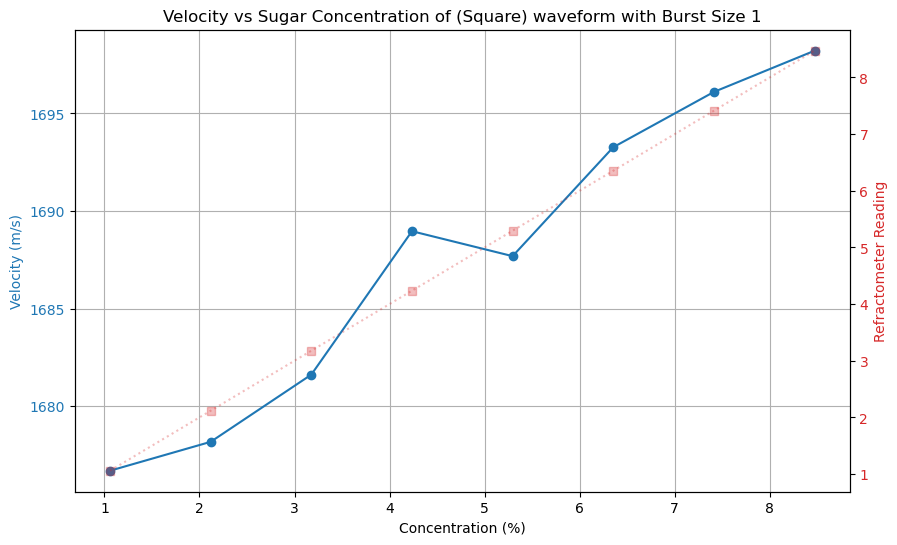

In [103]:
plot_velocity_refractometer(velocities, periods)

# Time of flight using Correlation

Selected Method is:  cross_correlation


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  144000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6116, 8662)]
TOF calculated: 4.9104e-05


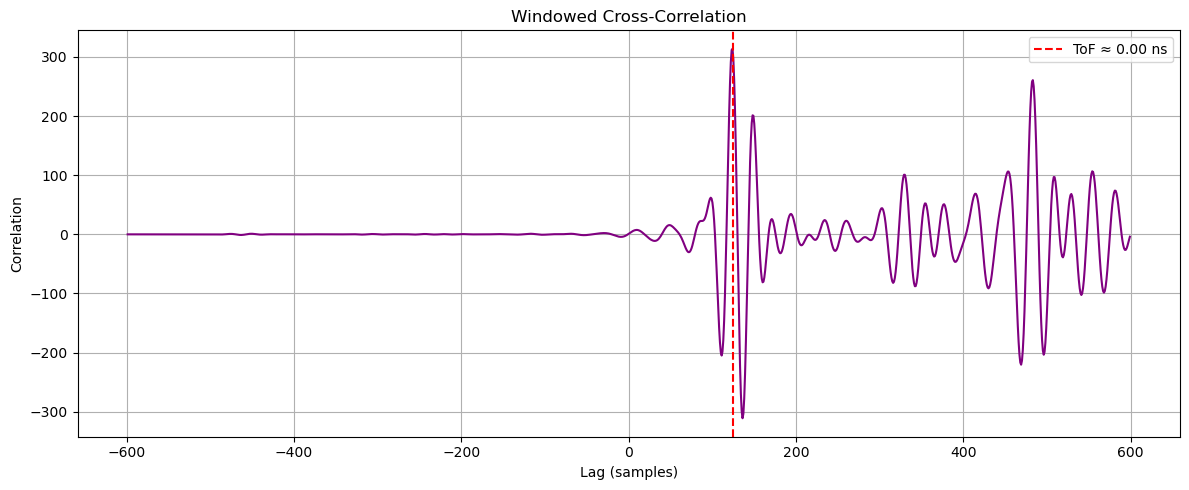

Velocity:  1690.2899967416097


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  108000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6147, 8714)]
TOF calculated: 4.924e-05


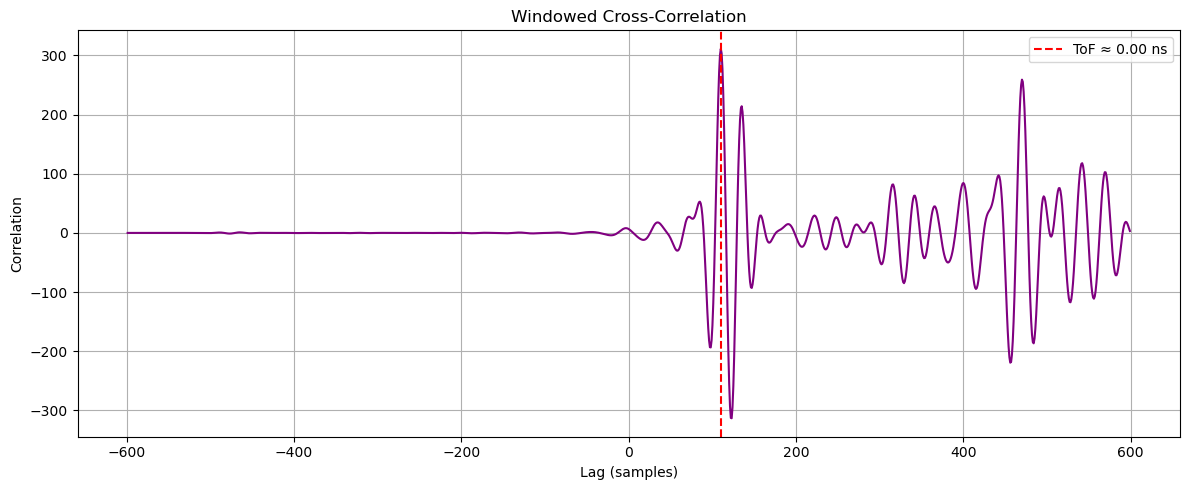

Velocity:  1685.621445978879


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  36000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6188, 8859)]
TOF calculated: 4.968e-05


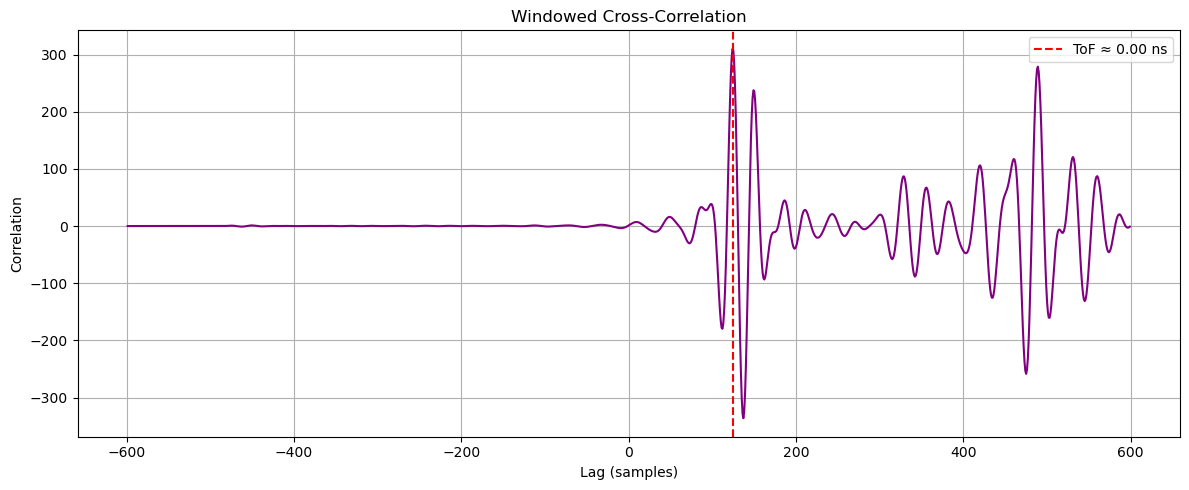

Velocity:  1670.692431561997


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/18000mg/2025may28-ram-WaterSugar_mid_solution-18000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  18000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6193, 8850)]
TOF calculated: 4.9728e-05


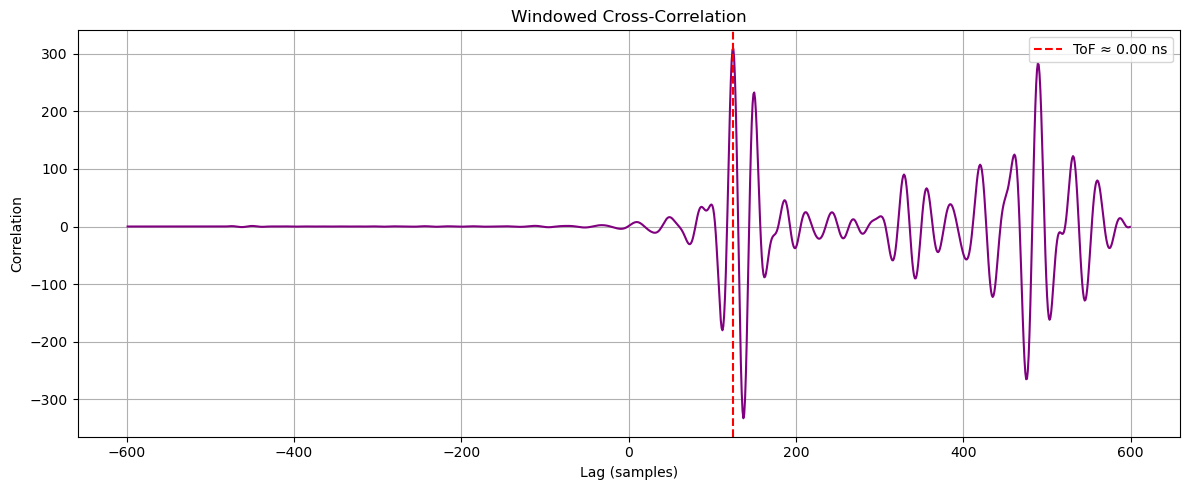

Velocity:  1669.079794079794


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/54000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-54000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  54000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6176, 8856)]
TOF calculated: 4.9584e-05


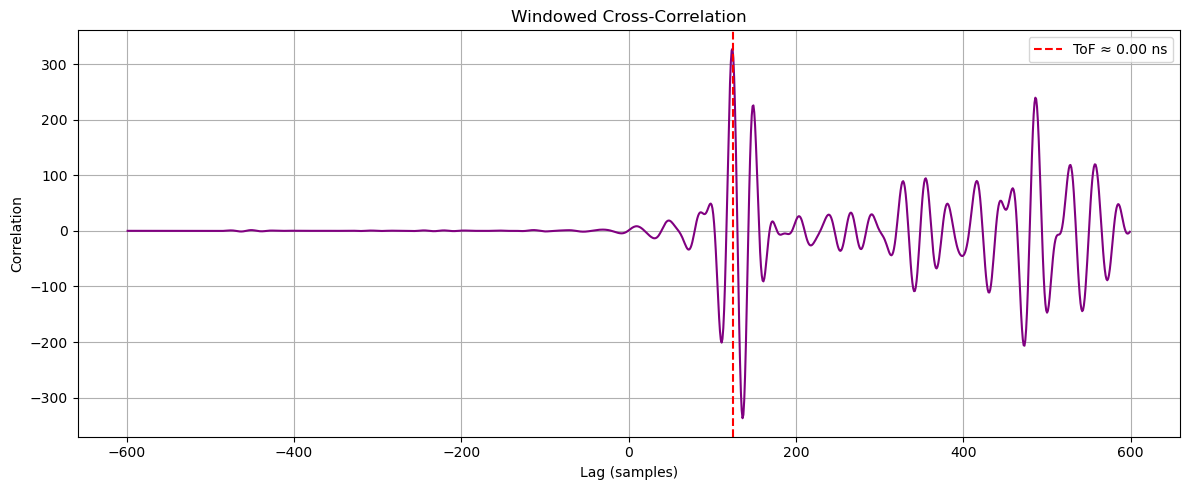

Velocity:  1673.9270732494354


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/90000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-90000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  90000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6167, 8846)]
TOF calculated: 4.94e-05


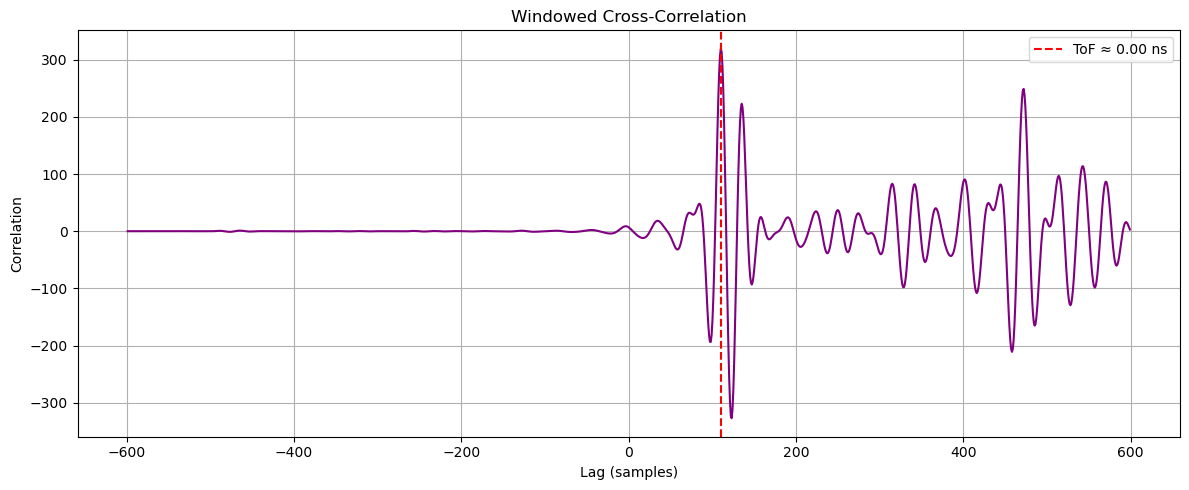

Velocity:  1680.1619433198382


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/72000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-72000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  72000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6164, 8858)]
TOF calculated: 4.9488e-05


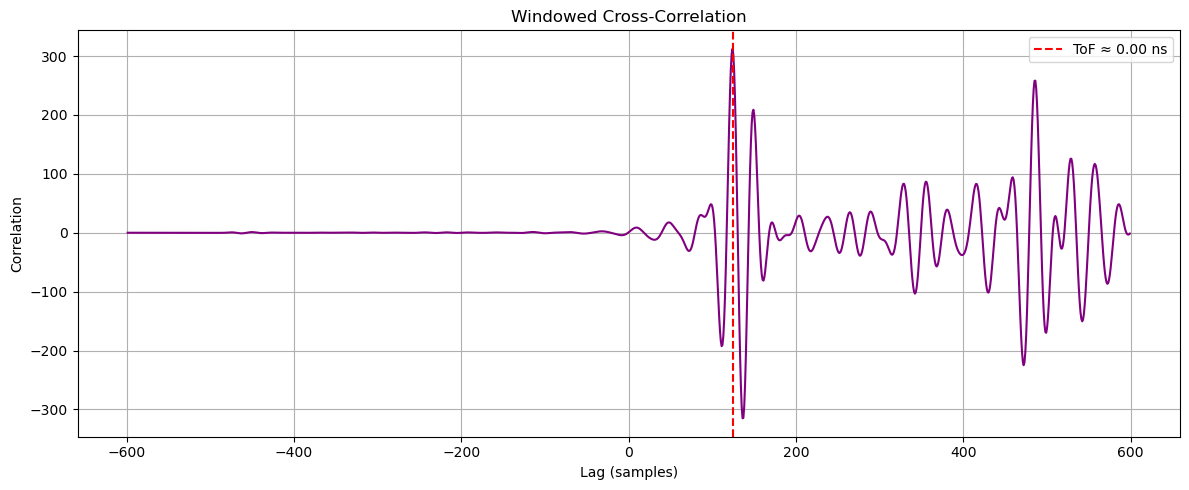

Velocity:  1677.174264468154


 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/126000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-126000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  126000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6137, 8688)]
TOF calculated: 4.916e-05


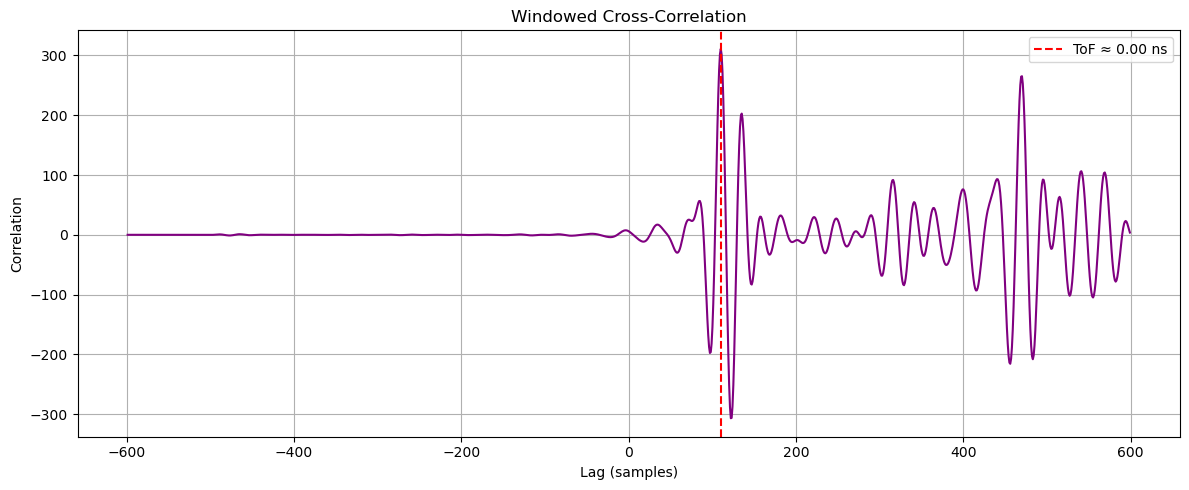

Velocity:  1688.364524003255
Selectd Index []


In [104]:
corr_velocities,time_of_flight,actual_waveform,receive_selected_index_list,transmit_selected_index_list =process_signals(unique_file_list, tof_method_index=2)

In [105]:
corr_velocities = sorted(corr_velocities, key=lambda x : x[0])


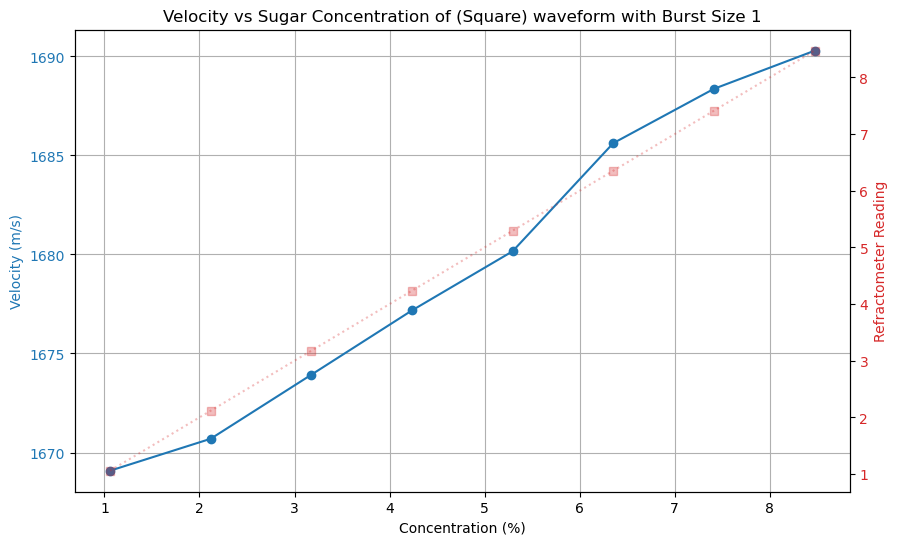

In [106]:
plot_velocity_refractometer(corr_velocities, periods)